# **<ins>K-Medoids</ins>**

Clustering is an unsupervised machine learning technique that divides the population or data points into several groups or clusters such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.<br>
<b>K-Medoids</b> is a clustering algorithm which is a little bit different from the K-Means technique in terms of the way they select the clusters' centres.<br>
We will implement the Partitioning Around Medoids algorithm. It is based on the search for k representative objects or medoids among the observations of the data set.
<br>
After obtaining a set of k medoids, clusters are constructed by assigning each observation to the nearest medoid. 

The process is followed with the following steps:
- Initialize k clusters in the given data space D.
- Randomly choose k objects from n objects in data and assign k objects to k clusters such that each object is assigned to one and only one cluster. Hence, it becomes an initial medoid for each cluster.
- For all remaining non-medoid objects, compute the Cost(distance as computed via Euclidean) from all medoids.
- Now, Assign each remaining non-medoid object to that cluster whose medoid distance to that object is minimum as compared to other clusters medoid.
- Compute the total cost i.e. it is the total sum of all the non-medoid objects distance from its cluster medoid.
- Now, swap the object i with medoid j and Repeat the steps to recalculate total cost (as needed). 
<br><img src="https://dinhanhthi.com/img/post/ML/clustering/kmeans-idea.png" style="width:80%">

## Implementation
### *Import required libraries* 

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from IPython import embed
from copy import deepcopy
import time

### *Initialization of medoids*
<b>select clusters (k) random points out of the n data points (n_samples) as the medoids</b> 

In [2]:
def _get_init_centers(k, n_samples):
    init_ids = []
    while len(init_ids) < k:
        x = np.random.randint(0,n_samples)
        if not x in init_ids:
            init_ids.append(x)
    return init_ids

### *Calculate Euclidean distances*

In [3]:
def _get_distance(x1, x2):
    #for distance function
    return np.sqrt(np.sum((x1 - x2)**2))

### *Calculate total cost and cost of each cluster by computing the distance matrix*

In [4]:
def _get_cost(X, centres, distance_fun):
    
    distance_matrix = np.zeros((len(X),len(centres)))
    #distance matrix
    for j in range(len(centres)):
        centre = X[centres[j],:]
        for i in range(len(X)):
            if i == centres[j]:
                distance_matrix[i,j] = 0.
            else:
                distance_matrix[i,j] = distance_fun(X[i,:], centre)
  
    mask = np.argmin(distance_matrix,axis=1)
    members = np.zeros(len(X))
    cost1 = np.zeros(len(centres))
    for i in range(len(centres)):
        m_id = np.where(mask==i)
        members[m_id] = i
        cost1[i] = np.sum(distance_matrix[m_id,i])
    return members, cost1, np.sum(cost1), distance_matrix

### *Swapping and recalculate the clusters*

In [5]:
def _kmedoids_run(X, k, distance_fun, max_itr=1000, tol=0.001, verbose=True):
    #returns changed centres, distance_matrix and costs
    n_samples, n_features = X.shape
    init_ids = _get_init_centers(k, n_samples) #get initial centers
    if verbose:
        print('Initial centers: ', init_ids)
    centres = init_ids
    members, costs, tCost, distance_matrix = _get_cost(X, init_ids,distance_fun)
    cc,swap = 0, True
    while True:
        swap = False
        for i in range(n_samples):
            if not i in centres:
                for j in range(len(centres)):
                    centres1 = deepcopy(centres)
                    centres1[j] = i
                    m, costs1, tCost1, distMat = _get_cost(X, centres1, distance_fun)
                    if tCost1 - tCost < tol:
                        members, costs, tCost, distance_matrix = m, costs1, tCost1, distMat
                        centres = centres1
                        swap = True
                        if verbose:
                            print ('Centres changed: ', centres)
        if cc > max_itr:
            if verbose:
                print ('End Searching as reached maximum iteration: ', max_itr)
            break
        if not swap:
            if verbose:
                print ('End Searching')
            break
        cc += 1
    return centres, members, costs, tCost, distance_matrix

#### KMedoids Clustering Info
##### Parameters
        k  : number of clusters
        distance_fun : distance function
        max_itr : maximum number of iterations
        tol : tolerance
##### Attributes
        centres :  cluster centres id
        costs_  :  array of costs for each cluster
        n_itr   :  number of iterations for the best trail
##### Methods
        fit(X): fit the model
             X: 2-D numpy array, size = (n_sample, n_features)
        predict(X): to predict cluster id given a test dataset.

In [6]:
class KMedoids(object):

    def __init__(self, k, distance_fun=_get_distance, max_itr=10000, tol=0.0001):
        self.k = k
        self.distance_fun = distance_fun
        self.max_itr = max_itr
        self.tol = tol

    def fit(self, X,plotit=True, verbose=True):
        centres, members, costs,tot_cost, distance_matrix = _kmedoids_run(
                X,self.k, self.distance_fun, max_itr=self.max_itr, tol=self.tol,verbose=verbose)
        if plotit:  #visualization
            fig, ax = plt.subplots(1,1)
            colors = ['b','g','r','c','m','y','k']
            if self.k > len(colors):
                raise ValueError('Add more colors')
            
            for i in range(len(centres)):
                X_c = X[members==i,:]
                ax.scatter(X_c[:,0],X_c[:,1],c=colors[i],alpha=0.5,s=30)
                ax.scatter(X[centres[i],0],X[centres[i],1], c=colors[i], alpha=1., s=250,marker='*')
        return

    def predict(self,X):
        raise NotImplementedError()

### *Run the KMedoids class with an example* 

Initial centers:  [64, 72, 164, 459, 477]
Centres changed:  [64, 72, 0, 459, 477]
Centres changed:  [1, 72, 0, 459, 477]
Centres changed:  [2, 72, 0, 459, 477]
Centres changed:  [3, 72, 0, 459, 477]
Centres changed:  [5, 72, 0, 459, 477]
Centres changed:  [5, 72, 0, 459, 6]
Centres changed:  [7, 72, 0, 459, 6]
Centres changed:  [10, 72, 0, 459, 6]
Centres changed:  [10, 72, 0, 11, 6]
Centres changed:  [10, 72, 13, 11, 6]
Centres changed:  [14, 72, 13, 11, 6]
Centres changed:  [14, 72, 32, 11, 6]
Centres changed:  [58, 72, 32, 11, 6]
Centres changed:  [58, 72, 32, 11, 59]
Centres changed:  [60, 72, 32, 11, 59]
Centres changed:  [60, 86, 32, 11, 59]
Centres changed:  [60, 184, 32, 11, 59]
Centres changed:  [60, 184, 32, 214, 59]
Centres changed:  [60, 184, 437, 214, 59]
Centres changed:  [60, 439, 437, 214, 59]
Centres changed:  [60, 8, 437, 214, 59]
Centres changed:  [60, 8, 44, 214, 59]
Centres changed:  [60, 119, 44, 214, 59]
End Searching


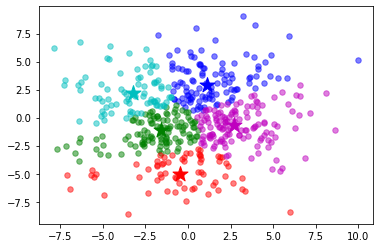

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def fun(x1, x2):
    #demo function
    return np.sqrt(np.sum((x1 - x2)**2))

if __name__ == '__main__':
    X = np.random.normal(0,3,(500,2))  #generates random data points
    model = KMedoids(k=5, distance_fun=fun)
    model.fit(X, plotit=True, verbose=True)
    plt.show()
#we are taking the value of k=5

From the above plot, we can conclude that 5 clusters are formed where implementation is done with medoid taken as a reference point.
PAM is computable costly as it performs clustering on the overall data set.<br>
Its time complexity for each iteration is ```O(k*(n-k)^2)```; where n is the number of objects in data and k is the number of clusters.

## References
- https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca
- https://www.geeksforgeeks.org/ml-k-medoids-clustering-with-example/
